In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
training_set=pd.read_csv("twitter_training.csv", header = None ,names=['number' , 'source' , 'label' , 'message'])
validation_set=pd.read_csv("twitter_validation.csv", header = None ,names=['number' , 'source' , 'label' , 'message'])

In [3]:
training_set

,number,source,label,message
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [4]:
validation_set

,number,source,label,message
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
...,...,...,...,...
995,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [5]:
validation_set.columns

Index(['number', 'source', 'label', 'message'], dtype='object')

In [6]:
training_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   number   74682 non-null  int64 
 1   source   74682 non-null  object
 2   label    74682 non-null  object
 3   message  73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [7]:
training_set.isna().sum()

number       0
source       0
label        0
message    686
dtype: int64

In [8]:
validation_set.isna().sum()

number     0
source     0
label      0
message    0
dtype: int64

In [9]:
from sklearn.impute import SimpleImputer
import numpy as np
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
new_massage_train=imp.fit_transform(np.array(training_set['message']).reshape(-1,1))
training_set['message']=new_massage_train.flatten()

In [10]:
training_set.isna().sum()

number     0
source     0
label      0
message    0
dtype: int64

In [11]:
from bs4 import BeautifulSoup
import re
import spacy
import emoji

In [13]:
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     - -------------------------------------- 0.5/12.8 MB 1.9 MB/s eta 0:00:07
     -- ------------------------------------- 0.8/12.8 MB 1.9 MB/s eta 0:00:07
     ---- ----------------------------------- 1.3/12.8 MB 1.8 MB/s eta 0:00:07
     ---- ----------------------------------- 1.6/12.8 MB 1.8 MB/s eta 0:00:07
     ------ --------------------------------- 2.1/12.8 MB 1.8 MB/s eta 0:00:07
     ------- -------------------------------- 2.4/12.8 MB 1.8 MB/s eta 0:00:06
     -------- ------------------------------- 2.6/12.8 MB 1.7 MB/s eta 0:00:06
     --------- ------------------------------ 3.1/12.8 MB 1.7 MB/s eta 0:00:06
     ---------- ----------------------------- 3.4/12.8 MB 1.7 MB/s eta 0:00:06
     ----------- ---------------------------- 3.7/12.8 MB 1.7 MB/s eta 0:00:06
     ------------- -------------------------- 4.2/12.8 MB 1.7 MB/s


[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
def remove_html(text):

    clean_text = BeautifulSoup(text , 'html.parser')

    return clean_text.get_text()

def clean_url(text):
    
    return re.sub(r'http\S+|www\S+', '', text)
def remove_punctuation(text):
    
    return re.sub(r'[^\w\s]', '', text)
nlp = spacy.load("en_core_web_sm")

def remove_stopwords(text):
    if not isinstance(text, str):  # Handle non-string inputs
        return text
        
    doc = nlp(text)
    return " ".join([token.text for token in doc if not token.is_stop])
def remove_emojis(text):
    return emoji.demojize(text)
def lemmatize_text(text):
    
    doc = nlp(text)
    return " ".join([token.lemma_ for token in doc])

In [15]:
def data_preprocessing(df):
    df['message'] = df['message'].str.lower()
    df['message'] = df['message'].apply(remove_html)
    print(df)
    df['message'] = df['message'].apply(clean_url)
    df['message'] = df['message'].apply(remove_punctuation)
    print(df)
    df['message'] = df['message'].apply(remove_stopwords)
    df['message'] = df['message'].apply(remove_emojis)
    print(df)
    df['message_lemmatized'] = df['message'].apply(lemmatize_text)
    return df

    

In [16]:
df_train=data_preprocessing(training_set)

C:\Users\Yara\AppData\Local\Temp\ipykernel_9692\3155567569.py:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  clean_text = BeautifulSoup(text , 'html.parser')


       number       source     label  \
0        2401  Borderlands  Positive   
1        2401  Borderlands  Positive   
2        2401  Borderlands  Positive   
3        2401  Borderlands  Positive   
4        2401  Borderlands  Positive   
...       ...          ...       ...   
74677    9200       Nvidia  Positive   
74678    9200       Nvidia  Positive   
74679    9200       Nvidia  Positive   
74680    9200       Nvidia  Positive   
74681    9200       Nvidia  Positive   

                                                 message  
0      im getting on borderlands and i will murder yo...  
1      i am coming to the borders and i will kill you...  
2      im getting on borderlands and i will kill you ...  
3      im coming on borderlands and i will murder you...  
4      im getting on borderlands 2 and i will murder ...  
...                                                  ...  
74677  just realized that the windows partition of my...  
74678  just realized that my mac window partiti

In [17]:
df_train

,number,source,label,message,message_lemmatized
0,2401,Borderlands,Positive,m getting borderlands murder,m get borderland murder
1,2401,Borderlands,Positive,coming borders kill,come border kill
2,2401,Borderlands,Positive,m getting borderlands kill,m get borderland kill
3,2401,Borderlands,Positive,m coming borderlands murder,m come borderland murder
4,2401,Borderlands,Positive,m getting borderlands 2 murder,m get borderland 2 murder
...,...,...,...,...,...
74677,9200,Nvidia,Positive,realized windows partition mac like 6 years nv...,realize windows partition mac like 6 year nvid...
74678,9200,Nvidia,Positive,realized mac window partition 6 years nvidia d...,realize mac window partition 6 year nvidia dri...
74679,9200,Nvidia,Positive,realized windows partition mac 6 years nvidia ...,realize windows partition mac 6 year nvidia dr...
74680,9200,Nvidia,Positive,realized windows partition mac like 6 years nv...,realize windows partition mac like 6 year nvid...


In [18]:
df_test=data_preprocessing(validation_set)

C:\Users\Yara\AppData\Local\Temp\ipykernel_9692\3155567569.py:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  clean_text = BeautifulSoup(text , 'html.parser')


     number               source       label  \
0      3364             Facebook  Irrelevant   
1       352               Amazon     Neutral   
2      8312            Microsoft    Negative   
3      4371                CS-GO    Negative   
4      4433               Google     Neutral   
..      ...                  ...         ...   
995    4891  GrandTheftAuto(GTA)  Irrelevant   
996    4359                CS-GO  Irrelevant   
997    2652          Borderlands    Positive   
998    8069            Microsoft    Positive   
999    6960      johnson&johnson     Neutral   

                                               message  
0    i mentioned on facebook that i was struggling ...  
1    bbc news - amazon boss jeff bezos rejects clai...  
2    @microsoft why do i pay for word when it funct...  
3    csgo matchmaking is so full of closet hacking,...  
4    now the president is slapping americans in the...  
..                                                 ...  
995  ⭐️ toronto is the a

In [19]:
df_train['label'] = df_train['label'].map({'Positive' : 1 ,  'Negative' : 0 ,'Neutral':2 , 'Irrelevant' : 2 })
df_train['label'].value_counts()

label
2    31308
0    22542
1    20832
Name: count, dtype: int64

In [20]:
df_test['label'] = df_test['label'].map({'Positive' : 1 ,  'Negative' : 0 ,'Neutral':2 , 'Irrelevant' : 2 })
df_test['label'].value_counts()

label
2    457
1    277
0    266
Name: count, dtype: int64

In [21]:
x_train=df_train['message_lemmatized']
y_train=df_train['label']
x_test=df_test['message_lemmatized']
y_test=df_test['label']

In [22]:
type(x_train)

pandas.core.series.Series

In [23]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(oov_token = 'nothing')
tokenizer.fit_on_texts(x_train) 

In [24]:
tokenizer.document_count

74682

In [25]:
X_train_seq = tokenizer.texts_to_sequences(x_train)
X_test_seq = tokenizer.texts_to_sequences(x_test)

In [26]:
# finding the max length
max_len = max(len(tokens) for tokens in X_train_seq)
print("Maximum sequence length (maxlen):", max_len)

Maximum sequence length (maxlen): 161


In [27]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Perform padding on X_train and X_test sequences and X_val

X_train_padded = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_test_padded = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

In [28]:
# Print the padded sequences for X_train and X_test
print("X_train_padded:")
print(X_train_padded[:1])
print("\nX_test_padded:")
print(X_test_padded[:1])

X_train_padded:
[[   5    9   59 1131    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0]]

X_test_padded:
[[  729    34  1009  3861   148    25  2329  1441    22  7010 12871     3
   1468   123  3816    43     5  1418   351   358     0     0  

In [29]:
# Define vocab size based on the tokenizer
vocab_size = len(tokenizer.word_index) + 1

print(vocab_size)

34932


In [31]:
from tensorflow.keras import regularizers
model = tf.keras.models.Sequential([

    tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=100),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128 , return_sequences = True , dropout = 0.2 , recurrent_dropout = 0.2)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64 , dropout = 0.2 , recurrent_dropout = 0.2)),
    tf.keras.layers.Dense(64 , activation='relu'  , kernel_initializer = 'he_normal', kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(3 , activation = 'softmax')

])
# defining callbacks for Early stopping and changing the learning rate while training 

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True, verbose=1)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1, min_lr=1e-6)

model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
)
with tf.device('/device:CPU:0'):
    history = model.fit(
        X_train_padded,  
        y_train,  
        validation_data=(X_test_padded, y_test), 
        batch_size=32,  
        epochs=30,  
        callbacks=[early_stopping,reduce_lr],  
        verbose=1 
    )

Epoch 1/30
2334/2334 ━━━━━━━━━━━━━━━━━━━━ 1142s 485ms/step - accuracy: 0.6327 - loss: 0.8313 - val_accuracy: 0.9220 - val_loss: 0.2355
Epoch 2/30
2334/2334 ━━━━━━━━━━━━━━━━━━━━ 1104s 473ms/step - accuracy: 0.8785 - loss: 0.3175 - val_accuracy: 0.9400 - val_loss: 0.1821
Epoch 3/30
2334/2334 ━━━━━━━━━━━━━━━━━━━━ 1095s 469ms/step - accuracy: 0.9158 - loss: 0.2147 - val_accuracy: 0.9460 - val_loss: 0.1695
Epoch 4/30
2334/2334 ━━━━━━━━━━━━━━━━━━━━ 1085s 465ms/step - accuracy: 0.9276 - loss: 0.1794 - val_accuracy: 0.9540 - val_loss: 0.1783
Epoch 5/30
2334/2334 ━━━━━━━━━━━━━━━━━━━━ 1089s 467ms/step - accuracy: 0.9399 - loss: 0.1528 - val_accuracy: 0.9520 - val_loss: 0.1708
Epoch 6/30
2334/2334 ━━━━━━━━━━━━━━━━━━━━ 1101s 472ms/step - accuracy: 0.9462 - loss: 0.1297 - val_accuracy: 0.9580 - val_loss: 0.1989
Epoch 7/30
2334/2334 ━━━━━━━━━━━━━━━━━━━━ 893s 382ms/step - accuracy: 0.9512 - loss: 0.1193 - val_accuracy: 0.9600 - val_loss: 0.2090
Epoch 8/30
2334/2334 ━━━━━━━━━━━━━━━━━━━━ 714s 306ms/ste

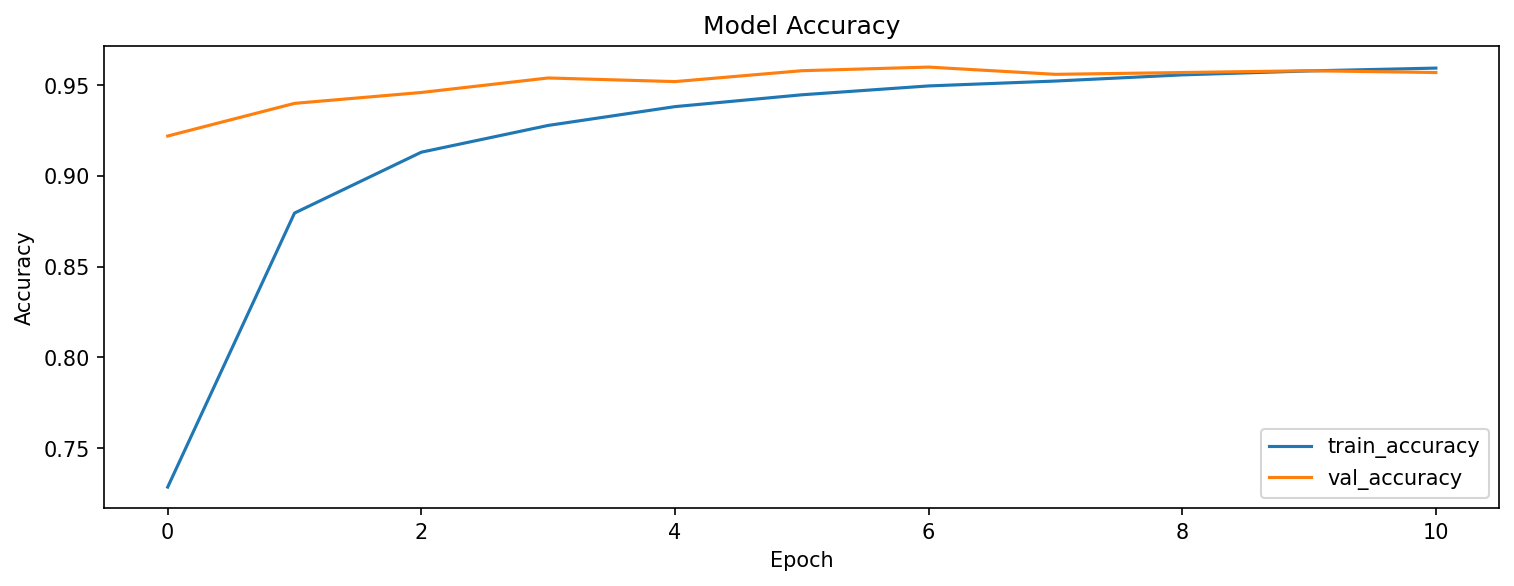

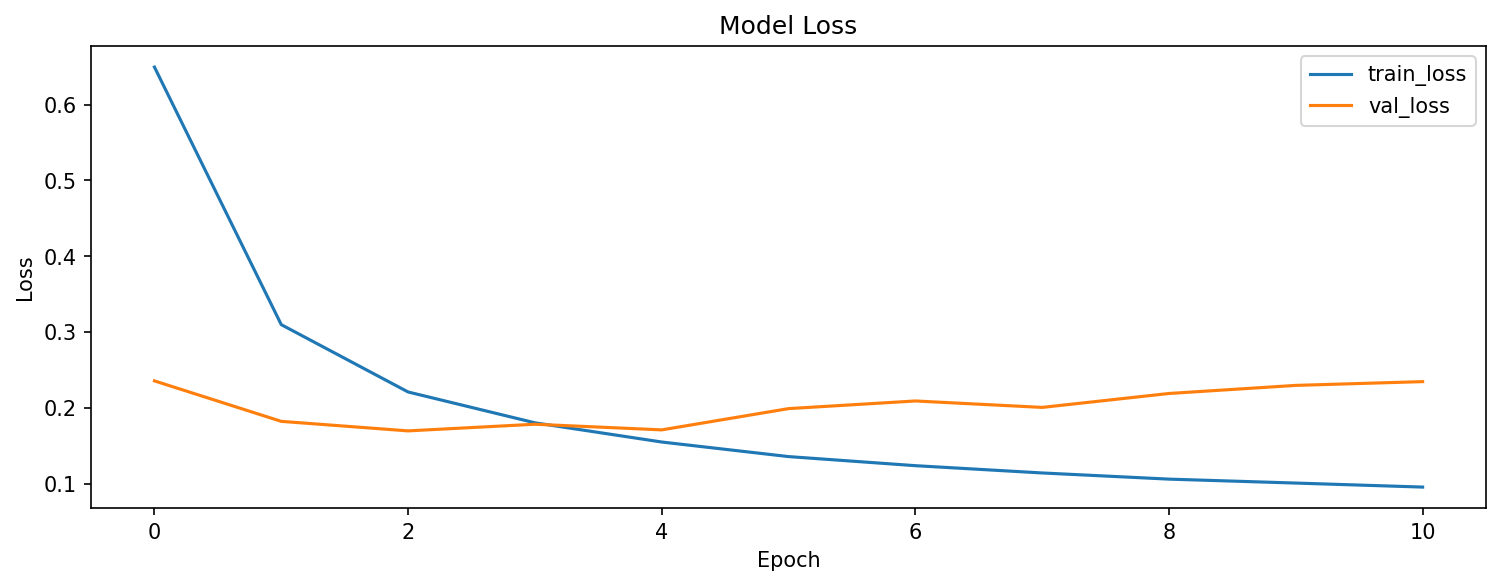

In [32]:
plt.figure(figsize=(12, 4), dpi=150)
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

plt.figure(figsize=(12, 4), dpi=150)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()


In [33]:
# Get model predictions (probabilities)
y_probs = model.predict(X_test_padded)

# Converting probs into Binary values
y_pred = np.argmax(y_probs, axis=1)
# Evaluate the model
loss, accuracy = model.evaluate(X_test_padded, y_test)
print(f"Loss: {loss}, Accuracy: {accuracy}") 

32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 91ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - accuracy: 0.9423 - loss: 0.1581
Loss: 0.1694977581501007, Accuracy: 0.9459999799728394


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       266
           1       0.95      0.92      0.94       277
           2       0.96      0.95      0.96       457

    accuracy                           0.95      1000
   macro avg       0.94      0.94      0.94      1000
weighted avg       0.95      0.95      0.95      1000



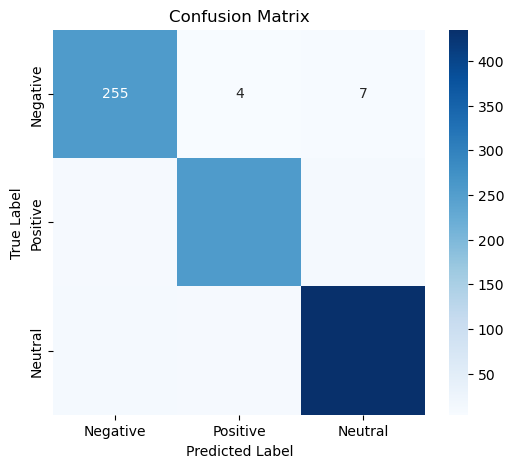

In [34]:

from sklearn.metrics import confusion_matrix , classification_report

cfm = confusion_matrix(y_test , y_pred)
# classification report
report = classification_report(y_test, y_pred)

# the report
print("Classification Report:")
print(report)
plt.figure(figsize=(6, 5))
sns.heatmap(cfm, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative' , 'Positive' , 'Neutral'], yticklabels=['Negative' , 'Positive','Neutral'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()